# Comparison of multivariate regressions for count data

In [1]:
import matplotlib
%matplotlib nbagg
from matplotlib import pyplot

/home/pfernique/.miniconda/envs/FPD17/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
library(MGLM)
data('rnaseq')
rnaseq['X'] = apply(rnaseq[,c(1,2,3,4,5,6)], 1, sum)
write.table(rnaseq[c(7,8,9,11)], 'rnaseq.csv', row.names=F)

In [4]:
from statiskit import (linalg,
                       core,
                       glm)
data = core.read_csv('rnaseq.csv', header=True)

<IPython.core.display.Javascript object>


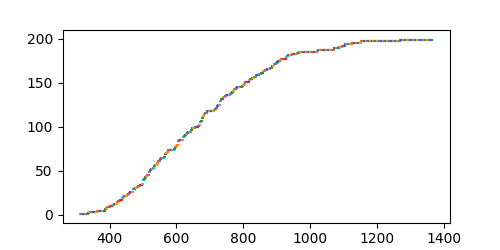

In [5]:
fig = pyplot.figure(figsize=(5,2.5))
data.X.cdf_plot(axes = fig.add_subplot(111), fmt='-')

In [16]:
x = 100

Insert variable contents here -> {{x}}.

In [15]:
dst = core.selection(data=data.extract(-1),
                     estimators=[core.poisson_estimation('ml'),
                                 core.binomial_estimation('ml', force=True),
                                 core.negative_binomial_estimation('ml')])
dst.scores[:]

[-6537.059114151809, -13223.754412953454, -1339.360020084458]

In [12]:
reg = core.selection(data=data.extract(response=-1),
                     estimators=[glm.poisson_estimation('Fisher'),
                                 glm.binomial_estimation('SA'),
                                 glm.negative_binomial_estimation('X2')])
reg.scores

[-6537.059114151809, nan, -1339.360020084458]

In [40]:
nbmle = core.negative_binomial_estimation('ml', data=data.X)
nbmle.estimated.loglikelihood(data.X)

-1334.06170271791

In [27]:
bmle = core.binomial_estimation('ml', data=data.X, force=True)
bmle.estimated.loglikelihood(data.X)

AttributeError: 'Estimator' object has no attribute 'force'

In [4]:
pfe = glm.poisson_estimation('Fisher', data=data, response=-1)

,totalReads,treatment,gender,X
0,$28317494$,$0$,$0$,$567$
1,$20015549$,$0$,$0$,$501$
2,$35318251$,$0$,$1$,$798$
3,$20421437$,$0$,$0$,$444$
4,$21940693$,$0$,$1$,$604$
5,$48645477$,$0$,$1$,$1070$
6,$22594877$,$0$,$0$,$544$
7,$28699250$,$0$,$0$,$670$
8,$46420975$,$0$,$0$,$930$
9,$23696486$,$0$,$1$,$462$


In [ ]:
nbfe = glm.negative_binomial_estimation('CSDFisher', data=data, response=-1)

In [ ]:
bfe = glm.binomial_estimation('SAFisher', data=data, response=-1)